DELATTRE Damien 000425862

# Math-F-314:Double pendulum


# 1. Introduction

Ce travail porte sur la résolution des équations du mouvement du [double pendule](https://en.wikipedia.org/wiki/Double_pendulum) par la [méthode de Runge-Kutta](https://fr.wikipedia.org/wiki/M%C3%A9thodes_de_Runge-Kutta) ainsi que sur la création d'une animation de ce pendule double. 

# 2. Le double pendule


Dans un système de référence tel que celui qui nous était donné dans l'énoncé, on peut exprimer la position du centre de masse du premier et du deuxième barreau, $(x_1, y_1)$ et $(x_2, y_2)$ respectivement comme

$$
\begin{equation}
x_{1,CM} = \frac{l}{2}\sin(\theta_1) \\
y_{1,CM} = -\frac{l}{2}\cos(\theta_1) \\
x_{2,CM} = l \ (\sin(\theta_1) + \frac{1}{2}\sin(\theta_2)) \\
y_{2,CM} = l \ (\cos(\theta_1) + \frac{1}{2}\cos(\theta_2))
\end{equation}
$$

Le lagrangien correspondant à ce problème est donné par 

$$ \begin{equation} 
L = \text{énergie cinétique} - \text{énergie potentielle} \\
  = \frac{1}{2} m \left( \dot{x_1}^2 + \dot{y_1}^2 + \dot{x_2}^2 + \dot{y_2}^2 \right) + \frac{1}{2}I \left( \dot{\theta_1}^2 + \dot{\theta_2}^2 \right) - mg \left( y_1 + y_2 \right)
\end{equation} $$

Ici le premier terme estl'énergie du centre de masse, le deuxième terme est l'énergie de rotation autour du centre de masse et le dernier terme est l'énergie potentielle.

Comme on a exprimé $x_1, y_1, x_2, y_2$ dans les variables $ \theta_1 $ et $ \theta_2$, il est possible d'exprimer le lagrangien dans ces variables. Pour cela on a

$$
\begin{equation}
\dot{x_{1,CM}} = \frac{l}{2}\cos(\theta_1)\dot{\theta_1} \\
\dot{y_{1,CM}} = \frac{l}{2}\sin(\theta_1)\dot{\theta_1} \\
\dot{x_{2,CM}} = l \ (\cos(\theta_1)\dot{\theta_1} + \frac{1}{2}\cos(\theta_2)\dot{\theta_2}) \\
\dot{y_{2,CM}} = -l \ (-\sin(\theta_1)\dot{\theta_1} + -\frac{1}{2}\sin(\theta_2)\dot{\theta_2}) \\
\end{equation}
$$

On remplace dans l'expressuin précédente du lagrangien et on obtient alors

$$
\begin{equation}
L = \frac{1}{6} ml^2 \left( \dot{\theta_2}^2 + 4\dot{\theta_1}^2 + 3\dot{\theta_1}\dot{\theta_2} \cos\left( \theta_1 - \theta_2 \right) \right) + \frac{1}{2} mgl \left( 3 \cos \left( \theta_1 \right) + \cos \left( \theta_2 \right) \right)
\end{equation}
$$

De la on peut remarquer que l'énergie est conservée car le lagrangien ne dépend pas du temps. De ce lagrangien, on peut trouver les équations du mouvement.

$$
\begin{equation}
p_{\theta_1} = \frac{\partial L}{\partial \dot{\theta_1}} = \frac{1}{6}ml^2 \left( 8\dot{\theta_1} + 3\dot{\theta_2}\cos(\theta_1 - \theta_2) \right) \\
p_{\theta_2} = \frac{\partial L}{\partial \dot{\theta_2}} = \frac{1}{6}ml^2 \left( 2\dot{\theta_1} + 3\dot{\theta_1}\cos(\theta_1 - \theta_2) \right)
\end{equation}
$$

Ces équation permettent de trouver $\dot{\theta_1}$ et $\dot{\theta_2}$

$$
\begin{equation}
\dot{\theta_1} = \frac{6}{ml^2} \frac{2p_{\theta_1} - 3 \cos(\theta_1 - \theta_2) p_{\theta_2}}{16 - 9\cos^2(\theta_1 - \theta_2)} \\
\dot{\theta_2} = \frac{6}{ml^2} \frac{8p_{\theta_2} - 3 \cos(\theta_1 - \theta_2) p_{\theta_1}}{16 - 9\cos^2(\theta_1 - \theta_2)}
\end{equation}
$$

Les équations restantes sont 

$$
\begin{equation}
\dot{p_{\theta_1}} = \frac{\partial L}{\partial {\theta_1}} = - \frac{1}{2}ml^2 \left( \dot{\theta_1} \dot{\theta_2} \sin(\theta_1 - \theta_2) + 3 \frac{g}{l}\sin(\theta_1) \right) \\
\dot{p_{\theta_2}} = \frac{\partial L}{\partial {\theta_2}} = - \frac{1}{2}ml^2 \left(- \dot{\theta_1} \dot{\theta_2} \sin(\theta_1 - \theta_2) +  \frac{g}{l}\sin(\theta_2) \right)
\end{equation}
$$

Ces 4 dernières équations ($\dot{\theta_1}, \dot{\theta_2}, \dot{p_{\theta_1}}, \dot{p_{\theta_2}}$) sont les équations à intégrer par la méthode de Runge-Kutta. 

# 3. La méthode de Runge-Kutta

La méthode RK4 permet de résoudre des équations différentielles du type 

$$
y' = f(t,y) \ \text{avec la condition initiale} \ y(0) = y_0
$$

Il faudra donc adapter cette méthode à notre système de 4 équations différentielles.


## 3.1 conditions initiales

Le double pendule a un mouvement chaotique et dépend donc très fortement des conditions initiales qu'on donne au problème.
Les 4 conditions qui nous sont données dans l'énoncé sont

$$
\begin{equation}
\theta_{1_0} = \theta_{2_0} = \frac{\pi}{2} \\
\dot{y_{1_0}} = \dot{y_{2_0}} = 0
\end{equation}
$$

Or on a vu précédement l'expression de $\dot{y_1}$ et $\dot{y_2}$

$$
\begin{equation}
\dot{y_1} = \frac{l}{2}\sin(\theta_1)\dot{\theta_1} \\
\dot{y_2} = -l \ (-\sin(\theta_1)\dot{\theta_1} + -\frac{1}{2}\sin(\theta_2)\dot{\theta_2})
\end{equation}
$$

Ceci implique que $\dot{\theta_1} = \dot{theta_2} = 0$ et donc on peut trouver une condition initiale sur $p_{\theta_1}$ et $p_{\theta_2}$

$$
\begin{equation}
p_{\theta_1} = p_{\theta_2} = 0
\end{equation}
$$

Les autres conditions qui nous sont données dans l'énoncé sont la masse et la longueur des deux barreaux $( m = 1kg )$ et $( l = 1m )$, $g = 9.81 m/s^2$, et l'intervalle de temps $dt = 0.001 s$.

## 3.2 Implémentation

On commence par importer tous les packages utiles aux calculs de RK4.

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

On peut maintenant écrire la méthode de Runge-Kutta.

In [21]:
def rk4(f,g,h,i, th10,th20,p10,p20, t0, stop, dt):
    th1 = th10
    th2 = th20
    p1 = p10
    p2 = p20 
    t = t0   #j'initialise mes données avec les conditions initiales.
    TH1 = [th10]
    TH2 = [th20]  #je crée des listes qui vont contenir les valeurs des angles theta1 et theta2 a chaque itération.
    data = []
    for n in range(int((stop - t0)/dt)): #je demande que le nombre d'itération corresponde à la durée divisée par l'intervalle de temps.
        f1 = f(t, th1, th2, p1, p2)
        g1 = g(t, th1, th2, p1, p2)
        h1 = h(t, th1, th2, p1, p2)
        i1 = i(t, th1, th2, p1, p2)
        
        f2 = f(t + dt/2, th1 + dt/2 * f1, th2 + dt/2 * g1, p1 + dt/2 * h1, p2 + dt/2  * i1)
        g2 = g(t + dt/2, th1 + dt/2 * f1, th2 + dt/2 * g1, p1 + dt/2 * h1, p2 + dt/2  * i1)
        h2 = h(t + dt/2, th1 + dt/2 * f1, th2 + dt/2 * g1, p1 + dt/2 * h1, p2 + dt/2  * i1)
        i2 = i(t + dt/2, th1 + dt/2 * f1, th2 + dt/2 * g1, p1 + dt/2 * h1, p2 + dt/2  * i1)
        
        f3 = f(t + dt/2, th1 + dt/2 * f2, th2 + dt/2 * g2, p1 + dt/2 * h2, p2 + dt/2 * i2)
        g3 = g(t + dt/2, th1 + dt/2 * f2, th2 + dt/2 * g2, p1 + dt/2 * h2, p2 + dt/2 * i2)
        h3 = h(t + dt/2, th1 + dt/2 * f2, th2 + dt/2 * g2, p1 + dt/2 * h2, p2 + dt/2 * i2)
        i3 = i(t + dt/2, th1 + dt/2 * f2, th2 + dt/2 * g2, p1 + dt/2 * h2, p2 + dt/2 * i2)
        
        f4 = f(t + dt, th1 + dt * f3, th2 + dt * g3, p1 + dt * h3, p2 + dt * i3)
        g4 = g(t + dt, th1 + dt * f3, th2 + dt * g3, p1 + dt * h3, p2 + dt * i3)
        h4 = h(t + dt, th1 + dt * f3, th2 + dt * g3, p1 + dt * h3, p2 + dt * i3)
        i4 = i(t + dt, th1 + dt * f3, th2 + dt * g3, p1 + dt * h3, p2 + dt * i3)     #je crée tous les coefficients de la méthode RK4 pour un système de 4 équations.
        
        llist = np.zeros(4)
        th1 += dt/6 * (f1 + 2*f2 + 2*f3 + f4)
        th2 += dt/6 * (g1 + 2*g2 + 2*g3 + g4)
        p1 += dt/6 * (h1 + 2*h2 + 2*h3 + h4)
        p2 += dt/6 * (i1 + 2*i2 + 2*i3 + i4)
        t += dt     #je modifie les valeurs des variables pour la prochaine itération.
        TH1.append(th1)
        TH2.append(th2)  #j'ajoute ces nouvelles valeurs a mes listes d'angles.
        llist[0] = th1
        llist[1] = th2
        llist[2] = p1
        llist[3] = p2
        data.append(llist)
    return TH1, TH2, data
#remarque cette fonction peut prendre un peu de temps selon l'intervalle demandé.

Cette fonction prend en compte 4 fonctions (f, g, h, i) ainsi que leur 4 conditions initiales respectives (th10, th20, p10, p20), un temps de début (t0) et un temps de fin (stop) ainsi que des intervalles de temps (dt). Cette fonction renvoie 2 listes d'angles.

Je peux définir les 4 fonctions qui vont être prises par RK4. Elles correspondent aux équations du mouvement écrites plus haut.

In [22]:
def dtheta1(t, th1, th2, p1, p2):
    return 6*((2*p1 - 3*np.cos(th1-th2)*p2)/(16 - 9*(np.cos(th1-th2)**2)))

def dtheta2(t, th1, th2, p1, p2):
    return 6*((8*p2 - 3*np.cos(th1-th2)*p1)/(16 - 9*(np.cos(th1-th2)**2)))

def p1dot(t, th1, th2, p1, p2):
    return -0.5*(dtheta1(t, th1, th2, p1, p2)*dtheta2(t, th1, th2, p1, p2)*np.sin(th1-th2) + 3*9.81*np.sin(th1))

def p2dot(t, th1, th2, p1, p2):
    return -0.5*(-1*dtheta1(t, th1, th2, p1, p2)*dtheta2(t, th1, th2, p1, p2)*np.sin(th1-th2) + 9.81*np.sin(th2))

Ici j'ai directement remplacé les constantes qui apparaissent dans les équations par leurs valeurs numériques. On peut entrer les valeurs des constantes pour une utilité future.

In [23]:
l = 1
m = 1
g = 9.81
dt = 0.001
th10 = np.pi/2
th20 = np.pi/2
p10 = 0
p20 = 0
t0 = 0
stop = 20

On peut maintenant appliquer la méthode RK4 à nos 4 fonctions.

In [24]:
sol = rk4(dtheta1,dtheta2,p1dot,p2dot, th10,th20,p10,p20, t0, stop, dt)
print(sol[0])
print(sol[1])

[1.5707963267948966, 1.5707900203663252, 1.5707711010806173, 1.5707395689378274, 1.5706954239381667, 1.5706386660821856, 1.570569295371026, 1.5704873118067486, 1.570392715392732, 1.570285506134143, 1.5701656840384814, 1.5700332491161966, 1.5698882013813753, 1.5697305408525042, 1.5695602675533034, 1.5693773815136327, 1.569181882770471, 1.5689737713689673, 1.5687530473635645, 1.5685197108191955, 1.5682737618125528, 1.5680152004334285, 1.5677440267861282, 1.5674602409909568, 1.5671638431857764, 1.5668548335276362, 1.5665332121944753, 1.566198979386897, 1.565852135330015, 1.5654926802753724, 1.5651206145029313, 1.5647359383231347, 1.564338652079041, 1.5639287561485273, 1.5635062509465676, 1.5630711369275785, 1.562623414587839, 1.562163084467979, 1.561690147155539, 1.561204603287601, 1.5607064535534878, 1.5601956986975332, 1.559672339521922, 1.5591363768895987, 1.558587811727244, 1.5580266450283224, 1.5574528778561954, 1.556866511347303, 1.5562675467144143, 1.5556559852499412, 1.55503182832

# 4. Coordonnées carthésiennes

On pourrait reprendre directement les coordonnées du centre de masses des barreaux dont on avait écrit l'expression plus haut mais nous devons trouver les coordonnées des extrêmités des barreaux. Les coordonnées des extrêmités des barreaux sont données par

$$
\begin{equation}
x_1 = l\sin\theta_1 \\ 
y_1 = - l\cos\theta_1 \\
x_2 = l (\sin\theta_1 + \sin\theta_2 ) \\
y_2 = - l (\cos\theta_1 + \cos\theta_2 )
\end{equation}
$$

On peut implémenter cette conversion.

In [25]:
def to_xy(th1,th2):
    n = len(th1)    #je regarde le nombre d'éléments dans ma liste.
    x1 = np.zeros(n)
    x2 = np.zeros(n)
    y1 = np.zeros(n)
    y2 = np.zeros(n)  #je crée 4 listes de la même longueur que les listes que j'ai donnée à la fonction.
    for i in range(n):
        X1 = l * np.sin(th1[i])
        Y1 = -l * np.cos(th1[i])
        X2 = X1 + l * np.sin(th2[i])
        Y2 = Y1 - l * np.cos(th2[i]) #j'applique les transformations à chaque éléments de ma liste.
        x1[i] = X1
        y1[i] = Y1
        x2[i] = X2
        y2[i] = Y2  #j'ajoute chaque élément dans la liste qui lui correspond.
    return x1, y1, x2, y2

Cette fonction prends 2 listes d'angles et renvoie 4 listes $x_1, y_1, x_2, y_2$ suivant les transformations écrites plus haut.

### Question 1: que valent les positions des extrémités des barreaux après $20s$ ?

In [26]:
q1 = to_xy(sol[0],sol[1])
print('premier barreau', 'x1', q1[0][-1], 'y1', q1[1][-1])
print('deuxième barreaux', 'x2', q1[2][-1], 'y2', q1[3][-1])

premier barreau x1 0.6626895594240738 y1 -0.7488942167157702
deuxième barreaux x2 0.06008963128577749 y2 0.04914921982620157


# animation

je commence par reprendre mes listes de coordonnées

In [27]:
x1 = q1[0]
y1 = q1[1]
x2 = q1[2]
y2 = q1[3]

TypeError: list indices must be integers or slices, not numpy.float64

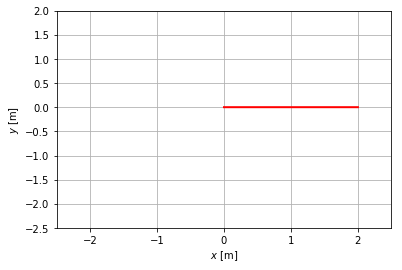

In [28]:
#je commence par créer le repère à l'aide de pyplot.
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.5, 2.5), ylim=(-2.5, 2))
ax.grid()
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')

line, = ax.plot([], [], 'r-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#je crée un fonction d'initialisation du temps dans l'animation.
def initiate():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

#on crée l'évolution dans le temps des données
def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (sol[2][i*0.01]))
    return line, time_text


anim = animation.FuncAnimation(fig, animate, np.arange(1, len(sol[2])),
                              interval=25, blit=True, init_func=initiate)
#on reprend l'animation vue au cours.

HTML(anim.to_html5_video())